<a href="https://colab.research.google.com/github/Ashubapun/Topic_Modelling/blob/main/GSDMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# To install the gsdmm package
!pip install git+https://github.com/rwalk/gsdmm.git

  Cloning https://github.com/rwalk/gsdmm.git to /tmp/pip-req-build-llg5gpj3
  Running command git clone --filter=blob:none --quiet https://github.com/rwalk/gsdmm.git /tmp/pip-req-build-llg5gpj3
  Resolved https://github.com/rwalk/gsdmm.git to commit 4ad1b6b6976743681ee4976b4573463d359214ee
  Preparing metadata (setup.py) ... done
  Created wheel for gsdmm: filename=gsdmm-0.1-py3-none-any.whl size=4586 sha256=d39dc4180ea76747e8056868f86c4bbcb2191377b0c1641808688119ee3e85b7
  Stored in directory: /tmp/pip-ephem-wheel-cache-o1_e86cz/wheels/da/d3/6e/a612d7cff0fcfb6470b8c113fc04931ecffb466ac19b9c5f3c
Successfully built gsdmm


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import nltk
import re
import string
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
# from sklearn.feature_extraction import stop_words

# from .mgp import MovieGroupProcess
from gsdmm import MovieGroupProcess

from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_notebook

In [ ]:
##Enter your csv path here
#path="/content/drive/MyDrive/tweets_cleaned_13_04_23.csv"
df=pd.read_csv('/content/tweets_cleaned_13_04_23.csv')
df_og=df.copy()

In [ ]:
import nltk
from nltk.stem import *
nltk.download('punkt') # For Stemming
nltk.download('wordnet') # For Lemmatization
nltk.download('stopwords') # For Stopword Removal
nltk.download('omw-1.4')

#---------------------------------------
#to preprocess all the tweets and add it to the corpus, returns a corpus(list of list)
stop_words = set(stopwords.words('english'))
def text_preprocessing(df):
    corpus=[]

    lem = WordNetLemmatizer() # For Lemmatization
    for i in df['Tweet']:
        words=[w for w in nltk.tokenize.word_tokenize(i) if (w not in stop_words)] # word_tokenize function tokenizes text on each word by default
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        corpus.append(words)
    return corpus

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
corpus=text_preprocessing(df)
print(f"length of corpus : {len(corpus)}\n type of corpus :{type(corpus)}")
#17639 tweets

length of corpus : 11578
 type of corpus :<class 'list'>


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Convert each document (inner list) to a string
documents = [" ".join(doc) for doc in corpus]

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=4)

# Transform the corpus into a term-document matrix
term_doc_matrix = vectorizer.fit_transform(documents)


In [ ]:

# Convert to dense matrix and print
term_doc_matrix=term_doc_matrix.todense()

In [ ]:
# To get the feature names (words/terms)
print(vectorizer.get_feature_names_out())

['aadmi' 'aakash' 'aam' ... '護身術' '𝒟𝒾𝑒𝒷𝒪' '𝔾𝔸𝕄𝔼']


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import TruncatedSVD

class FLSA:
    def __init__(self, num_topics):
        self.num_topics = num_topics

    def _sigmoid_membership_function(self, x, a=1, b=0.5):
        """Sigmoid membership function for fuzzy transformation."""
        return 1 / (1 + np.exp(-a * (x - b)))

    def fit(self, term_doc_matrix):
        # Convert term-document matrix to fuzzy matrix using sigmoid membership function
        # fuzzy_term_doc = self._sigmoid_membership_function(term_doc_matrix)
        # Convert term-document matrix to numpy array
        # Convert term-document matrix to numpy array
        if hasattr(term_doc_matrix, "toarray"):
          term_doc_array = term_doc_matrix.toarray()
        else:
          term_doc_array = np.array(term_doc_matrix)

        # Scale the term-document matrix
        scaler = MinMaxScaler()
        scaled_term_doc = scaler.fit_transform(term_doc_array)

        # Fuzzify the scaled term-document matrix
        fuzzy_term_doc = self._sigmoid_membership_function(scaled_term_doc)

        # Apply LSA using SVD
        svd = TruncatedSVD(n_components=self.num_topics)
        self.U = svd.fit_transform(fuzzy_term_doc)
        self.Sigma = svd.singular_values_
        self.Vt = svd.components_


    def get_topics_for_docs(self):
        """Return topics for documents (tweets)."""
        return self.Sigma_k @ self.Vt_k
    def get_topics_for_terms(self, num_terms=20):
      topics = []
      self.terms = vectorizer.get_feature_names_out()
      for topic_idx, topic in enumerate(self.Vt):
          top_term_indices = topic.argsort()[-num_terms:][::-1]  # Get indices of top terms for this topic
          top_terms = [self.terms[i] for i in top_term_indices]  # Map indices to actual terms
          topics.append(top_terms)
      return topics

# ... Your FLSA class ...

# After fitting:
flsa = FLSA(num_topics=4)
flsa.fit(term_doc_matrix)
topics_for_terms = flsa.get_topics_for_terms()

# Print topics
for idx, topic_terms in enumerate(topics_for_terms):
    print(f"Topic {idx + 1}: {', '.join(topic_terms)}")

Topic 1: health, amp, sport, football, politics, ipl, technology, cricket, make, new, today, news, get, join, day, mentalhealth, use, time, say, break
Topic 2: tipsfornewdocs, foam, clinicalpearl, clinicaltips, medstudents, medicine, medtwitter, medical, meded, medicare, healthcare, health, diagnosis, cardioed, pulmtwitter, pulmonology, cardiotwitter, cardiology, academictwitter, pulmonary
Topic 3: newsbreak, break, breakingnews, tennis, sport, entertainment, football, usa, hockey, news, baseball, market, stock, trend, foam, clinicalpearl, clinicaltips, tipsfornewdocs, medstudents, soccer
Topic 4: ipl, sport, cricket, football, match, kkr, player, tataipl, win, rcb, score, follow, league, game, crickettwitter, premier, wicket, indian, kkrvsrcb, over


In [ ]:
flsa = FLSA(num_topics=4)
flsa.fit(term_doc_matrix)
print("Topics for Terms:\n", flsa.get_topics_for_terms())
print("Topics for Documents (Tweets):\n", flsa.get_topics_for_docs())

Topics for Terms:
 [[-3.31597956e+01 -3.92963864e-03 -1.77960968e-02 -3.08932803e-02]
 [-3.31612782e+01 -4.91207624e-02  3.26060798e-03 -1.92746264e-02]
 [-3.31591568e+01 -1.44001985e-03 -1.55070249e-02 -1.53528850e-02]
 ...
 [-3.31558493e+01  1.25528819e-02 -3.02585868e-03  8.54328440e-02]
 [-3.31598297e+01  1.61305009e-02  1.96293216e-02  7.24902647e-02]
 [-3.31606943e+01  1.06031571e-02  2.33525840e-02  3.01287039e-02]]
Topics for Documents (Tweets):
 [[-5.01524973e+01 -5.01503188e+01 -5.01524973e+01 ... -5.01521284e+01
  -5.01728170e+01 -5.01540944e+01]
 [ 2.43619378e-03  2.45995717e-03  2.43619378e-03 ...  9.73189153e-04
  -2.42876840e-03  4.02767580e-03]
 [-2.48416970e-03 -1.63330407e-03 -2.48416970e-03 ... -3.71081541e-03
  -7.22208399e-03  3.38371036e-03]
 [ 3.60840246e-03  1.46315847e-02  3.60840246e-03 ... -1.94537527e-03
  -1.36308702e-02  3.27488203e-02]]


In [ ]:
from gensim.models import word2vec
from gensim.models import FastText

In [ ]:
#Training the word2vec model on our corpus with optimal parameters (found experimentally)
np.random.seed(0)
w2v_model = word2vec.Word2Vec(min_count=4,
                     window=2,
                     vector_size=100,
                     workers=4,
                    #  sg=1,
                     )

w2v_model.build_vocab(corpus, progress_per=10000)

w2v_model.train(corpus,
                total_examples=w2v_model.corpus_count,
                epochs=20, report_delay=1)


(5136330, 6165660)

Topic 1: newsbreak, blockchain, social, use, year, share, video, potential, platform, good, mentalhealth, book, create, innovative, study, usa, article, happiness, full, episode, break, issue, time, china, intelligence, leverage, minister, podcast, market, congress, knowledge, design, privacy, chain, newyear, fintech, economy, happynewyear, report, research
Topic 2: cricket, ipl, tataipl, csk, match, kkr, crickettwitter, premierleague, breakingnews, srh, kkrvsrcb, wicket, rcb, sport, gtvskkr, msdhoni, gtvkkr, delhicapitals, sportsnews, mivscsk, cskvsmi, mumbaiindians, over, icc, player, pbks, rajasthanroyals, dhoni, rrvspbks, mivcsk, gujarattitans, epl, league, viratkohli, stadium, kkrvrcb, rrvpbks, win, soccer, football
Topic 3: politics, congress, vote, republican, democrat, trump, bjp, election, party, conservative, candidate, biden, political, want, president, primeminister, government, gop, ask, elect, state, politician, johnson, member, right, midterm, tory, would, poll, house, d

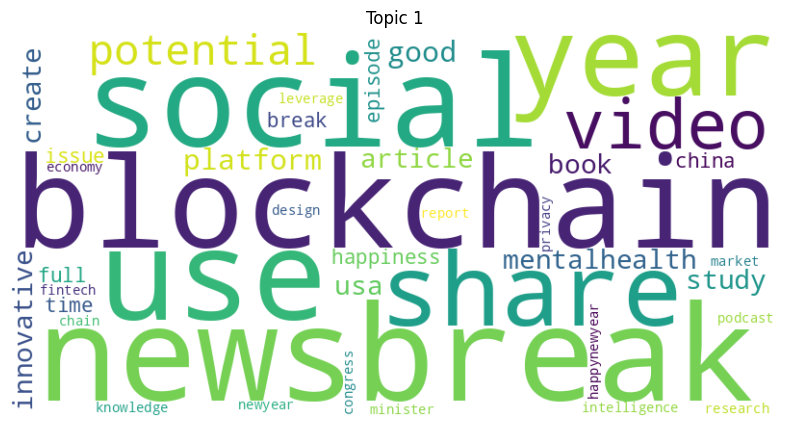

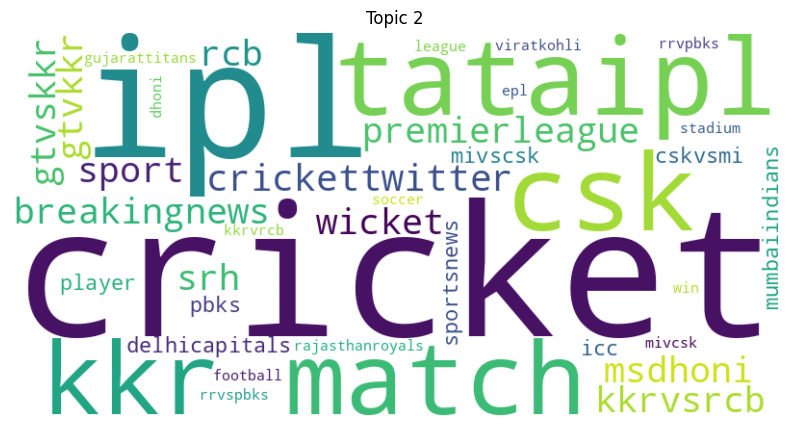

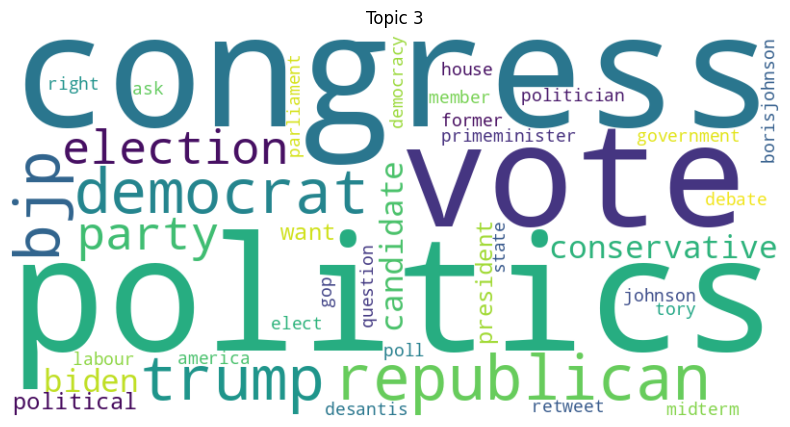

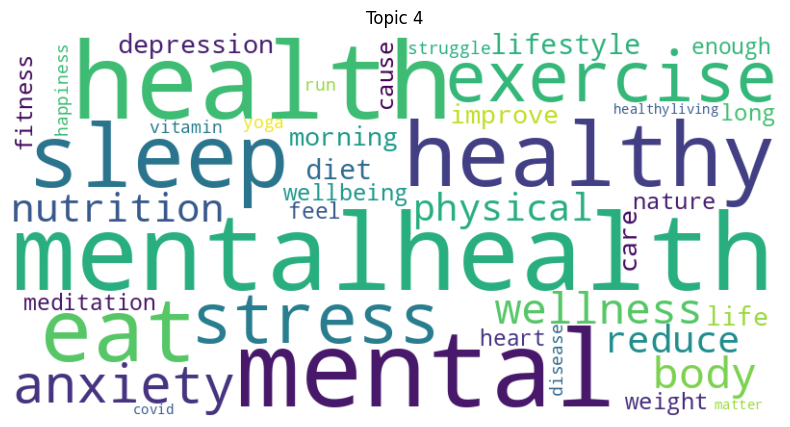

In [ ]:
#------------------------------FLSA_E-------------------------

import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler

class FLSA_Word2Vec_Embeddings:
    def __init__(self, num_topics, w2v_model):
        self.num_topics = num_topics
        self.w2v_model = w2v_model

    def _sigmoid_membership_function(self, x, a=1, b=0.5):
        return 1 / (1 + np.exp(-a * (x - b)))

    def _document_embedding(self, document):
        embeddings = [self.w2v_model.wv[word] for word in document if word in self.w2v_model.wv]
        if embeddings:
            return np.mean(embeddings, axis=0)
        else:
            return np.zeros(self.w2v_model.vector_size)

    def fit(self, corpus):
        # Obtain Document-Embedding matrix from Word2Vec embeddings
        doc_embeddings = np.array([self._document_embedding(doc) for doc in corpus])

        # Fuzzify the Document-Embedding matrix
        scaler = MinMaxScaler()
        scaled_embeddings = scaler.fit_transform(doc_embeddings)
        fuzzy_embeddings = self._sigmoid_membership_function(scaled_embeddings)

        # Apply LSA using SVD
        svd = TruncatedSVD(n_components=self.num_topics)
        self.U = svd.fit_transform(fuzzy_embeddings)
        self.Sigma = svd.singular_values_
        self.Vt = svd.components_

    def get_topics(self, num_words=40):
        # Extract the top words for each topic
        topics = []
        for idx, topic in enumerate(self.Vt):
            top_word_indices = np.argsort(np.dot(self.w2v_model.wv.vectors, topic))[-num_words:][::-1]
            top_words = [self.w2v_model.wv.index_to_key[i] for i in top_word_indices]
            topics.append(top_words)
        return topics

# Assuming you've already loaded your Word2Vec model into 'w2v_model' and your corpus into 'corpus'
flsa_w2v = FLSA_Word2Vec_Embeddings(num_topics=4, w2v_model=w2v_model)
flsa_w2v.fit(corpus)

topics = flsa_w2v.get_topics()
for idx, topic_words in enumerate(topics):
    print(f"Topic {idx + 1}: {', '.join(topic_words)}")



# -----------------------------------------------WordCloud==========================
import matplotlib.pyplot as plt
from wordcloud import WordCloud


def generate_wordcloud_for_topic(topic_words):
    # Convert topic words into a single string
    text = ' '.join(topic_words)

    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    return wordcloud

# Display the word cloud for each topic
for idx, topic_words in enumerate(topics):
    wc = generate_wordcloud_for_topic(topic_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {idx + 1}")
    plt.show()


In [ ]:
# from nltk.corpus import wordnet as wn

# class FLSA_w:
#     def __init__(self, num_topics, w2v_model):
#         self.num_topics = num_topics
#         self.w2v_model = w2v_model

#     def _sigmoid_membership_function(self, x, a=1, b=0.5):
#         return 1 / (1 + np.exp(-a * (x - b)))

#     def _fuzzify(self, term, document):
#         # Calculate fuzziness score using the sigmoid membership function based on the embedding similarity
#         similarities = [self._sigmoid_membership_function(self.w2v_model.wv.similarity(term, word)) for word in document if word in self.w2v_model.wv]
#         return np.mean(similarities) if similarities else 0

#     def fit(self, corpus):
#         # Obtain Term-Document matrix from Word2Vec embeddings
#         terms = list(self.w2v_model.wv.key_to_index.keys())
#         matrix = np.zeros((len(terms), len(corpus)))

#         for j, doc in enumerate(corpus):
#             for i, term in enumerate(terms):
#                 matrix[i, j] = self._fuzzify(term, doc)

#         # Apply LSA using SVD
#         svd = TruncatedSVD(n_components=self.num_topics)
#         self.U = svd.fit_transform(matrix)
#         self.Sigma = svd.singular_values_
#         self.Vt = svd.components_

#     def get_topics(self, num_words=20):
#         topics = []
#         terms = list(self.w2v_model.wv.key_to_index.keys())
#         for idx, topic in enumerate(self.Vt):
#             top_word_indices = topic.argsort()[-num_words:][::-1]
#             top_words = [terms[i] for i in top_word_indices]
#             topics.append(top_words)
#         return topics

# # Assuming you've already loaded your Word2Vec model into 'w2v_model' and your corpus into 'corpus'
# flsa_w = FLSA_W(num_topics=4, w2v_model=w2v_model)
# flsa_w.fit(corpus)

# topics = flsa_w.get_topics()
# for idx, topic_words in enumerate(topics):
#     print(f"Topic {idx + 1}: {', '.join(topic_words)}")


In [ ]:
#-------------------------FLSA_V---------------------------
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from gensim.models import Word2Vec
from gensim.similarities import WmdSimilarity

class FLSA_V:
    def __init__(self, num_topics, word2vec_model):
        self.num_topics = num_topics
        self.word2vec_model = word2vec_model

    def _fuzzify(self, term, terms):
        # Compute fuzzy scores based on Word2Vec similarities
        if term not in self.word2vec_model.wv:
            return np.zeros(len(terms))
        similarities = [self.word2vec_model.wv.similarity(term, t) if t in self.word2vec_model.wv else 0 for t in terms]
        return np.array(similarities)

    def fit(self, corpus):
        # Creating a Term-Document matrix using TF-IDF
        vectorizer = TfidfVectorizer()
        tfidf_matrix = vectorizer.fit_transform([" ".join(doc) for doc in corpus])
        terms = vectorizer.get_feature_names_out()

        # Fuzzification using Word2Vec-based approach
        fuzzy_matrix = np.zeros(tfidf_matrix.shape)
        for i, term in enumerate(terms):
            fuzzy_matrix[i, :] = tfidf_matrix[i, :].toarray() + self._fuzzify(term, terms)

        # Apply LSA using SVD
        svd = TruncatedSVD(n_components=self.num_topics)
        self.U = svd.fit_transform(fuzzy_matrix.T)
        self.Sigma = svd.singular_values_
        self.Vt = svd.components_

    def get_topics(self, num_words=10):
        topics = []
        terms = vectorizer.get_feature_names_out()
        for idx, topic in enumerate(self.Vt):
            top_word_indices = topic.argsort()[-num_words:][::-1]
            top_words = [terms[i] for i in top_word_indices]
            topics.append(top_words)
        return topics

# Assuming you've trained a Word2Vec model named 'w2v_model'
# and you have your corpus in the variable 'corpus'
flsa_v = FLSA_V(num_topics=4, word2vec_model=w2v_model)
flsa_v.fit(corpus)

topics = flsa_v.get_topics()
for idx, topic_words in enumerate(topics):
    print(f"Topic {idx + 1}: {', '.join(topic_words)}")


KeyboardInterrupt: ignored

In [ ]:
#--------------------FLSA_W + W2VEMBD------------------
import numpy as np
from sklearn.decomposition import TruncatedSVD
from nltk.corpus import wordnet as wn

class FLSA_W:
    def __init__(self, num_topics, word2vec_model):
        self.num_topics = num_topics
        self.word2vec_model = word2vec_model

    def _fuzzify(self, term, terms):
        # Get hypernyms using WordNet
        synsets = wn.synsets(term)
        hypernyms = set(lemma for synset in synsets for hypernym in synset.hypernyms() for lemma in hypernym.lemma_names())

        # Calculate fuzziness score
        similarities = [self.word2vec_model.wv.similarity(term, hypernym) for hypernym in hypernyms if hypernym in self.word2vec_model.wv]
        fuzziness = np.mean(similarities) if similarities else 0
        return fuzziness
    def fit(self, corpus):
        # Create the term-context matrix from Word2Vec
        terms = list(self.word2vec_model.wv.key_to_index.keys())
        matrix = np.array([self.word2vec_model.wv[term] for term in terms])

        # Fuzzification using WordNet-based approach
        for i, term in enumerate(terms):
            # matrix[i, :] += self._fuzzify(term, terms)
            fuzziness = self._fuzzify(term, terms)
            # matrix[i, :] += fuzziness * matrix[i, :]
            matrix[i, :] *= fuzziness

        # Apply LSA using SVD
        svd = TruncatedSVD(n_components=self.num_topics)
        self.U = svd.fit_transform(matrix)
        self.Sigma = svd.singular_values_
        self.Vt = svd.components_

    def get_topics(self, num_words=10):
        topics = []
        terms = list(self.word2vec_model.wv.key_to_index.keys())
        for idx, topic in enumerate(self.Vt):
            top_word_indices = topic.argsort()[-num_words:][::-1]
            top_words = [terms[i] for i in top_word_indices]
            topics.append(top_words)
        return topics

# Assuming you've trained a Word2Vec model named 'w2v_model'
# and you have your corpus in the variable 'corpus'
flsa_w = FLSA_W(num_topics=4, word2vec_model=w2v_model)
flsa_w.fit(corpus)

topics = flsa_w.get_topics()
for idx, topic_words in enumerate(topics):
    print(f"Topic {idx + 1}: {', '.join(topic_words)}")


Topic 1: congress, india, find, many, cricket, next, would, web, back, digital
Topic 2: power, win, want, let, week, help, team, join, take, research
Topic 3: back, week, life, win, learn, look, share, fitness, see, talk
Topic 4: today, read, player, would, amp, man, time, party, bjp, talk


In [ ]:
# Combined

from collections import Counter

class FLSA_Combined:
    def __init__(self, num_topics, w2v_model):
        self.num_topics = num_topics
        self.word2vec_model = w2v_model

    def fit(self, corpus):
        self.flsa_w = FLSA_W(self.num_topics,self.word2vec_model)
        self.flsa_v = FLSA_V_Embeddings(self.num_topics, self.word2vec_model)
        self.flsa_e = FLSA_Word2Vec_Embeddings(self.num_topics, self.word2vec_model)

        self.flsa_w.fit(corpus)
        self.flsa_v.fit(corpus)
        self.flsa_e.fit(corpus)

    def get_combined_topics(self, num_words=10):
        topics_w = self.flsa_w.get_topics(num_words=3 * num_words) # Getting more words to have a broader selection
        topics_v = self.flsa_v.get_topics(num_words=3 * num_words)
        topics_e = self.flsa_e.get_topics(num_words=3 * num_words)

        combined_topics = []
        for topic_idx in range(self.num_topics):
            counter = Counter(topics_w[topic_idx] + topics_v[topic_idx] + topics_e[topic_idx])
            combined_topic = [word for word, _ in counter.most_common(num_words)]
            combined_topics.append(combined_topic)

        return combined_topics

# Assume we've trained a Word2Vec model named 'w2v_model' and have the corpus in 'corpus'
flsa_combined = FLSA_Combined(num_topics=4, w2v_model=w2v_model)
flsa_combined.fit(corpus)

topics_new = flsa_combined.get_combined_topics()
for idx, topic_words in enumerate(topics_new):
    print(f"Topic {idx + 1}: {', '.join(topic_words)}")


Topic 1: digital, good, newsbreak, social, breakingnews, minister, year, share, mvpharris, crickettwitter
Topic 2: win, cricket, ipl, tataipl, csk, kkr, kkrvsrcb, match, crickettwitter, delhicapitals
Topic 3: right, election, politics, congress, vote, bjp, trump, republican, democrat, conservative
Topic 4: fitness, life, mentalhealth, health, mental, healthy, exercise, wellbeing, wellness, morning


In [ ]:
topics

[['newsbreak',
  'blockchain',
  'social',
  'use',
  'year',
  'share',
  'video',
  'potential',
  'platform',
  'good',
  'mentalhealth',
  'book',
  'create',
  'innovative',
  'study',
  'usa',
  'article',
  'happiness',
  'full',
  'episode',
  'break',
  'issue',
  'time',
  'china',
  'intelligence',
  'leverage',
  'minister',
  'podcast',
  'market',
  'congress',
  'knowledge',
  'design',
  'privacy',
  'chain',
  'newyear',
  'fintech',
  'economy',
  'happynewyear',
  'report',
  'research'],
 ['cricket',
  'ipl',
  'tataipl',
  'csk',
  'match',
  'kkr',
  'crickettwitter',
  'premierleague',
  'breakingnews',
  'srh',
  'kkrvsrcb',
  'wicket',
  'rcb',
  'sport',
  'gtvskkr',
  'msdhoni',
  'gtvkkr',
  'delhicapitals',
  'sportsnews',
  'mivscsk',
  'cskvsmi',
  'mumbaiindians',
  'over',
  'icc',
  'player',
  'pbks',
  'rajasthanroyals',
  'dhoni',
  'rrvspbks',
  'mivcsk',
  'gujarattitans',
  'epl',
  'league',
  'viratkohli',
  'stadium',
  'kkrvrcb',
  'rrvpbks',

In [ ]:
dict_words = {'tech' : topics[0], 'sports' : topics[1], 'politics' : topics[2], 'health' : topics[3]}
dict_words

{'tech': ['newsbreak',
  'blockchain',
  'social',
  'use',
  'year',
  'share',
  'video',
  'potential',
  'platform',
  'good',
  'mentalhealth',
  'book',
  'create',
  'innovative',
  'study',
  'usa',
  'article',
  'happiness',
  'full',
  'episode',
  'break',
  'issue',
  'time',
  'china',
  'intelligence',
  'leverage',
  'minister',
  'podcast',
  'market',
  'congress',
  'knowledge',
  'design',
  'privacy',
  'chain',
  'newyear',
  'fintech',
  'economy',
  'happynewyear',
  'report',
  'research'],
 'sports': ['cricket',
  'ipl',
  'tataipl',
  'csk',
  'match',
  'kkr',
  'crickettwitter',
  'premierleague',
  'breakingnews',
  'srh',
  'kkrvsrcb',
  'wicket',
  'rcb',
  'sport',
  'gtvskkr',
  'msdhoni',
  'gtvkkr',
  'delhicapitals',
  'sportsnews',
  'mivscsk',
  'cskvsmi',
  'mumbaiindians',
  'over',
  'icc',
  'player',
  'pbks',
  'rajasthanroyals',
  'dhoni',
  'rrvspbks',
  'mivcsk',
  'gujarattitans',
  'epl',
  'league',
  'viratkohli',
  'stadium',
  'kkrv

In [ ]:
X = df_og.drop(columns = 'Hashtag')
y = df_og['Hashtag']

# Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tweets_y = le.fit_transform(y)

In [ ]:
# Label Mapping
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_name_mapping

{'health': 0, 'politics': 1, 'sports': 2, 'tech': 3}

In [ ]:
# Spliting Data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, tweets_y, test_size=0.30, random_state=0)

In [ ]:
# Classifying the test data based on cosine similarity score

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

# Set up NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

# Dataset of texts
dataset = X_test['Tweet'].tolist()

# Predefined dictionary of categories
categories = dict_words

# Remove stopwords and tokenize the dataset
tokenized_dataset = []
for text in dataset:
    tokens = word_tokenize(text.lower())
    filtered_words = [word for word in tokens if word.isalnum() and word not in stop_words]
    tokenized_dataset.append(filtered_words)

# Train Word2Vec model
model = Word2Vec(tokenized_dataset, min_count=1, vector_size=300, epochs=100)

# Calculate similarity of each text to the dictionary words
results = []
for text in dataset:
    tokens = word_tokenize(text.lower())
    filtered_words = [word for word in tokens if word.isalnum() and word not in stop_words]

    similarities = {}
    for category, words in categories.items():
        category_vectors = [model.wv[word] for word in words if word in model.wv.key_to_index]
        if category_vectors:
            category_similarity = sum(model.wv.n_similarity([category_vector], filtered_words) for category_vector in category_vectors)
            similarities[category] = category_similarity

    predicted_category = max(similarities, key=similarities.get)
    results.append((text, predicted_category))

# Create a dataframe with the text and classification
df_new = pd.DataFrame(results, columns=['Text', 'Classification'])
df_new


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Text,Classification
0,controversial confession ufc winner sam hughes...,sports
1,now on sdglive map our way out of water shorta...,tech
2,react politics cdnpoli canpol polcan canpoli s...,politics
3,and here to hope we emphasize mentalhealth as ...,health
4,finalize my last piece of write health lebanon,health
...,...,...
5287,atchatasks dr mercedes himmons what do be an a...,health
5288,lebanese women don enter politics not cos we b...,politics
5289,innovation alert health innovation hackathon b...,tech
5290,ipl kkr spinners wreak havoc to hand rcb huge ...,sports


In [ ]:
df_new['Classification'] = df_new.Classification.map({'health': 0, 'politics': 1, 'sports': 2, 'tech': 3})

In [ ]:
# Checking the accuracy
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report
acc = accuracy_score(y_test, df_new.Classification)
cm = confusion_matrix(y_test, df_new.Classification)
acc, cm

(0.8941798941798942,
 array([[1194,   16,   11,   58],
        [ 116, 1288,   13,   63],
        [  36,   36, 1196,   15],
        [ 147,   15,   34, 1054]]))

In [ ]:
print(classification_report(y_test, df_new.Classification))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1279
           1       0.95      0.87      0.91      1480
           2       0.95      0.93      0.94      1283
           3       0.89      0.84      0.86      1250

    accuracy                           0.89      5292
   macro avg       0.90      0.89      0.89      5292
weighted avg       0.90      0.89      0.89      5292



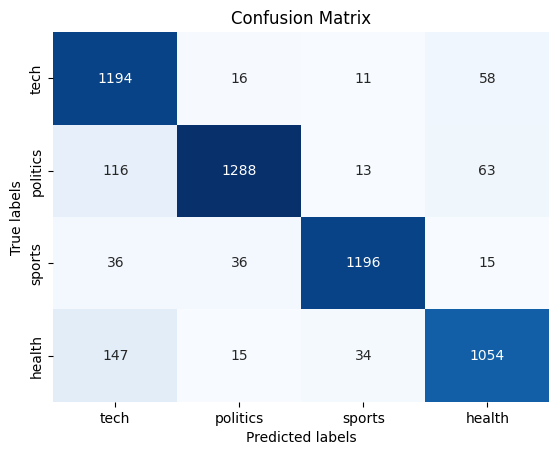

In [ ]:
ax = plt.subplot()
labels = ['tech', 'politics', 'sports', 'health']
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels = labels, yticklabels = labels)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
#calculation of coherence score
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

topics_list=[]

# # top_40_wrods_topic_0=top_40_wrods_topic_0
# # top_40_wrods_topic_1=top_40_wrods_topic_1
# # # top_40_wrods_topic_2=top_40_wrods_topic_2

topics_list.append(topics[0])
topics_list.append(topics[1])
topics_list.append(topics[2])
topics_list.append(topics[3])
print(topics_list)

# Creating a dictionary with the vocabulary
word2id = Dictionary( corpus )

# Coherence model
cm = CoherenceModel(topics=topics_list,
                    texts=corpus,
                    coherence='c_v',
                    dictionary=word2id)

coherence_per_topic = cm.get_coherence_per_topic()
coherence = cm.get_coherence()
print(coherence)

[['newsbreak', 'blockchain', 'social', 'use', 'year', 'share', 'video', 'potential', 'platform', 'good', 'mentalhealth', 'book', 'create', 'innovative', 'study', 'usa', 'article', 'happiness', 'full', 'episode', 'break', 'issue', 'time', 'china', 'intelligence', 'leverage', 'minister', 'podcast', 'market', 'congress', 'knowledge', 'design', 'privacy', 'chain', 'newyear', 'fintech', 'economy', 'happynewyear', 'report', 'research'], ['cricket', 'ipl', 'tataipl', 'csk', 'match', 'kkr', 'crickettwitter', 'premierleague', 'breakingnews', 'srh', 'kkrvsrcb', 'wicket', 'rcb', 'sport', 'gtvskkr', 'msdhoni', 'gtvkkr', 'delhicapitals', 'sportsnews', 'mivscsk', 'cskvsmi', 'mumbaiindians', 'over', 'icc', 'player', 'pbks', 'rajasthanroyals', 'dhoni', 'rrvspbks', 'mivcsk', 'gujarattitans', 'epl', 'league', 'viratkohli', 'stadium', 'kkrvrcb', 'rrvpbks', 'win', 'soccer', 'football'], ['politics', 'congress', 'vote', 'republican', 'democrat', 'trump', 'bjp', 'election', 'party', 'conservative', 'candida

In [ ]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
from nltk.corpus import wordnet as wn
import scipy.special

class FLSA_W_Sigmoid:
    def __init__(self, num_topics, word2vec_model):
        self.num_topics = num_topics
        self.word2vec_model = word2vec_model

    def _fuzzify(self, term, terms):
        # Get hypernyms using WordNet
        synsets = wn.synsets(term)
        hypernyms = set(lemma for synset in synsets for hypernym in synset.hypernyms() for lemma in hypernym.lemma_names())

        # Calculate fuzziness score using sigmoid membership function
        similarities = [self.word2vec_model.wv.similarity(term, hypernym) for hypernym in hypernyms if hypernym in self.word2vec_model.wv]
        fuzziness = np.mean([scipy.special.expit(sim) for sim in similarities]) if similarities else 0
        # fuzziness = np.mean(similarities) if similarities else 0
        return fuzziness

    def fit(self, corpus):
        # Create the term-context matrix from Word2Vec
        terms = list(self.word2vec_model.wv.key_to_index.keys())
        matrix = np.array([self.word2vec_model.wv[term] for term in terms])

        # Fuzzification using WordNet-based approach
        for i, term in enumerate(terms):
            fuzziness = self._fuzzify(term, terms)
            matrix[i, :] *= fuzziness

        # Apply LSA using SVD
        svd = TruncatedSVD(n_components=self.num_topics)
        self.U = svd.fit_transform(matrix)
        self.Sigma = svd.singular_values_
        self.Vt = svd.components_

    def get_topics(self, num_words=10):
        topics = []
        terms = list(self.word2vec_model.wv.key_to_index.keys())
        for idx, topic in enumerate(self.Vt):
            top_word_indices = topic.argsort()[-num_words:][::-1]
            top_words = [terms[i] for i in top_word_indices]
            topics.append(top_words)
        return topics

# Assuming you've trained a Word2Vec model named 'w2v_model'
# and you have your corpus in the variable 'corpus'
flsa_w_sigmoid = FLSA_W_Sigmoid(num_topics=4, word2vec_model=w2v_model)
flsa_w_sigmoid.fit(corpus)

topics = flsa_w_sigmoid.get_topics()
for idx, topic_words in enumerate(topics):
    print(f"Topic {idx + 1}: {', '.join(topic_words)}")


In [ ]:
# import numpy as np
# from sklearn.decomposition import TruncatedSVD
# from sklearn.preprocessing import MinMaxScaler
# from gensim.models import Word2Vec
# from gensim.models import TfidfModel
# from gensim.corpora import Dictionary

# class FLSA_W:
#     def __init__(self, num_topics):
#         self.num_topics = num_topics

#     def _sigmoid_membership_function(self, x, a=1, b=0.5):
#         return 1 / (1 + np.exp(-a * (x - b)))

#     def fit(self, document_vectors):
#         # Normalize the vectors to scale between 0 and 1
#         scaler = MinMaxScaler()
#         scaled_vectors = scaler.fit_transform(document_vectors)

#         # Fuzzify using the sigmoid membership function
#         fuzzy_vectors = self._sigmoid_membership_function(scaled_vectors)

#         # Apply SVD
#         svd = TruncatedSVD(n_components=self.num_topics)
#         self.U = svd.fit_transform(fuzzy_vectors)
#         self.Sigma = svd.singular_values_
#         self.Vt = svd.components_

#     def transform(self, document_vectors):
#         # Apply the same transformations (scaling, fuzzification, and SVD projection)
#         scaler = MinMaxScaler()
#         scaled_vectors = scaler.fit_transform(document_vectors)
#         fuzzy_vectors = self._sigmoid_membership_function(scaled_vectors)
#         return fuzzy_vectors @ self.Vt.T
#     def get_topics(self, num_words=5):
#         """Return the top num_words for each topic."""
#         topics = []
#         term_list = list(w2v_model.wv.key_to_index.keys())  # Get the list of terms from our Word2Vec model

#         for idx, topic in enumerate(self.Vt):
#             # Get the indices of the top words for this topic
#             top_word_indices = topic.argsort()[-num_words:][::-1]
#             top_words = [term_list[i] for i in top_word_indices]
#             topics.append(top_words)
#         return topics
# # Compute average Word2Vec vectors for each document
# document_vectors = []
# for doc in corpus:
#     doc_vector = np.mean([w2v_model.wv[word] for word in doc if word in w2v_model.wv], axis=0)
#     document_vectors.append(doc_vector)

# document_vectors = np.array(document_vectors)

# # Apply FLSA_W
# flsa_w = FLSA_W(num_topics=4)
# flsa_w.fit(document_vectors)

# # If you want to transform other documents, use:
# # transformed_vectors = flsa_w.transform(other_document_vectors)


In [ ]:
# # Extract topics and their words
# topics = flsa_w.get_topics(num_words=10)
# for idx, topic_words in enumerate(topics):
#     print(f"Topic {idx + 1}: {', '.join(topic_words)}")

In [ ]:
# class FLSA_V:
#     def __init__(self, num_topics):
#         self.num_topics = num_topics

#     def _sigmoid_membership_function(self, x, a=1, b=0.5):
#         return 1 / (1 + np.exp(-a * (x - b)))

#     def fit(self, documents):
#         # Step 1: Construct Term-Document Matrix using Vector Space Model
#         vectorizer = CountVectorizer()
#         tdm = vectorizer.fit_transform(documents).toarray().T  # transpose to get term-document format

#         # Step 2: Fuzzify the TDM
#         scaler = MinMaxScaler()
#         scaled_tdm = scaler.fit_transform(tdm)
#         fuzzy_tdm = self._sigmoid_membership_function(scaled_tdm)

#         # Step 3: Apply LSA using SVD
#         svd = TruncatedSVD(n_components=self.num_topics)
#         self.U = svd.fit_transform(fuzzy_tdm)
#         self.Sigma = svd.singular_values_
#         self.Vt = svd.components_
#         self.terms = vectorizer.get_feature_names_out()

#     def get_topics(self, num_words=5):
#         topics = []
#         for idx, topic in enumerate(self.Vt):
#             top_word_indices = topic.argsort()[-num_words:][::-1]
#             top_words = [self.terms[i] for i in top_word_indices]
#             topics.append(top_words)
#         return topics


In [ ]:
# flsa_v = FLSA_V(num_topics=4)
# flsa_v.fit(corpus)

# topics = flsa_v.get_topics(num_words=10)
# for idx, topic_words in enumerate(topics):
#     print(f"Topic {idx + 1}: {', '.join(topic_words)}")

In [ ]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler
from gensim.models import Word2Vec

class FLSA_V_Embeddings:
    def __init__(self, num_topics, w2v_model):
        self.num_topics = num_topics
        self.w2v_model = w2v_model

    def _sigmoid_membership_function(self, x, a=1, b=0.5):
        return 1 / (1 + np.exp(-a * (x - b)))

    def _document_embedding(self, document):
        embeddings = [self.w2v_model.wv[key] for key in document if key in self.w2v_model.wv.key_to_index]
        if embeddings:
            return np.mean(embeddings, axis=0)
        else:
            return np.zeros(self.w2v_model.vector_size)

    def fit(self, corpus):
        # Create a Document-Embedding matrix using averaged Word2Vec embeddings
        document_embeddings = np.array([self._document_embedding(doc) for doc in corpus])

        # Fuzzify the Document-Embedding matrix
        scaler = MinMaxScaler()
        scaled_embeddings = scaler.fit_transform(document_embeddings)
        fuzzy_embeddings = self._sigmoid_membership_function(scaled_embeddings)

        # Apply LSA using SVD
        svd = TruncatedSVD(n_components=self.num_topics)
        self.U = svd.fit_transform(fuzzy_embeddings)
        self.Sigma = svd.singular_values_
        self.Vt = svd.components_

    def get_topics(self, num_words=10):
        topics = []
        for idx, topic in enumerate(self.Vt):
            # Find words whose embeddings are closest to the topic vector
            top_word_indices = np.argsort(np.dot(self.w2v_model.wv.vectors, topic))[-num_words:][::-1]
            top_words = [self.w2v_model.wv.index_to_key[i] for i in top_word_indices]
            topics.append(top_words)
        return topics

In [ ]:
flsa_v = FLSA_V_Embeddings(num_topics=4, w2v_model=w2v_model)
flsa_v.fit(corpus)

topics = flsa_v.get_topics(num_words=50)
for idx, topic_words in enumerate(topics):
    print(f"Topic {idx + 1}: {', '.join(topic_words)}")

Topic 1: newsbreak, social, breakingnews, minister, year, share, mvpharris, crickettwitter, news, design, break, full, book, unmuteindia, newzealand, srilanka, medium, study, issue, good, people, happiness, usa, kamalaharris, platform, digital, video, mentalhealth, daysofcode, hockey, potential, newsupdate, time, episode, political, economy, report, happynewyear, economic, leverage, basketball, china, peace, podcast, wish, truth, economics, cybersecurity, vitamin, art
Topic 2: cricket, ipl, tataipl, csk, kkr, kkrvsrcb, match, crickettwitter, delhicapitals, rcb, srh, sportsnews, gtvkkr, breakingnews, wicket, gtvskkr, msdhoni, over, mivscsk, cskvsmi, rajasthanroyals, icc, mumbaiindians, dhoni, win, kkrvrcb, mivcsk, player, rrvpbks, premierleague, pbks, rrvspbks, sport, gujarattitans, viratkohli, kohli, stadium, league, indiancricket, cricketnews, lsgvssrh, cricketlovers, dcvsgt, shikhardhawan, rcbvskkr, lsg, prediction, bcci, cup, epl
Topic 3: politics, congress, vote, bjp, trump, republ

In [ ]:
topics

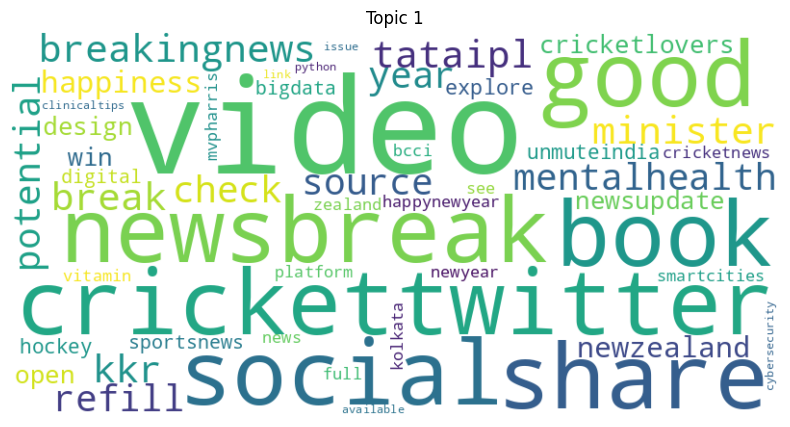

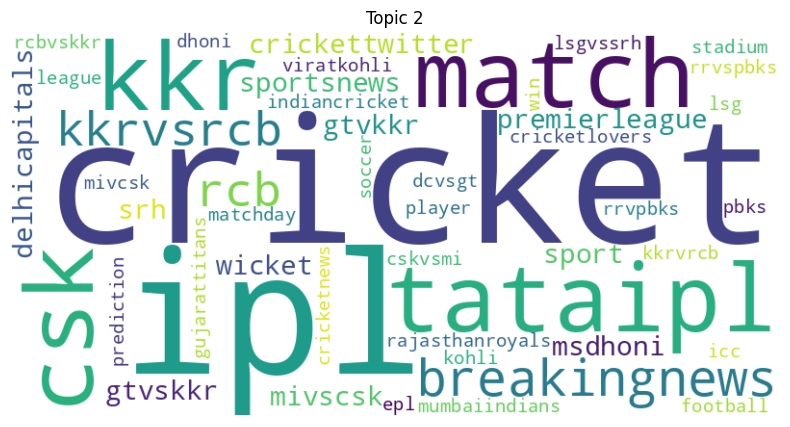

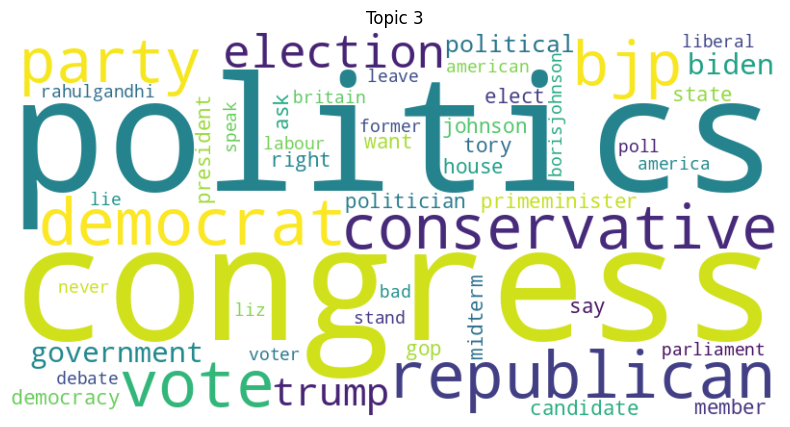

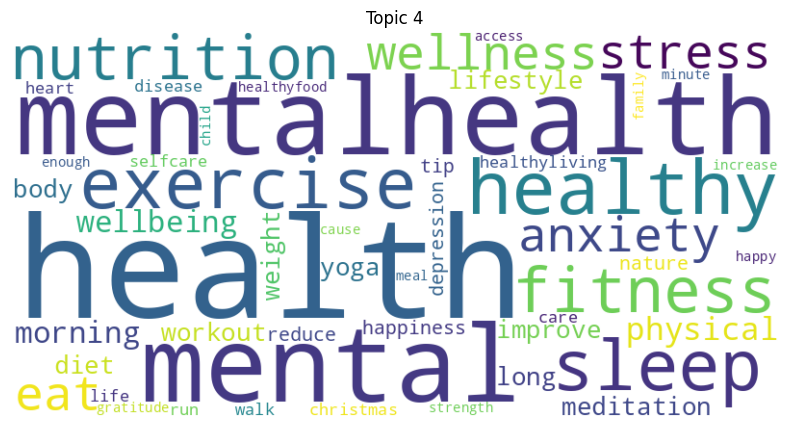

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


def generate_wordcloud_for_topic(topic_words):
    # Convert topic words into a single string
    text = ' '.join(topic_words)

    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    return wordcloud

# Display the word cloud for each topic
for idx, topic_words in enumerate(topics):
    wc = generate_wordcloud_for_topic(topic_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {idx + 1}")
    plt.show()

In [ ]:
dict_words = {'tech' : topics[0], 'sports' : topics[1], 'politics' : topics[2], 'health' : topics[3]}
dict_words

In [ ]:
# topic_words

In [ ]:
df_og

,Unnamed: 0,Tweet,Hashtag
0,0,effect of anthocyanins on gut health markers f...,health
1,1,good news recently accept position as software...,health
2,2,start keto this month eat about lbs of pork be...,health
3,3,be healthy mean get whole lot more out of life...,health
4,4,butterfly welcome the feed govt announcement o...,health
...,...,...,...
17634,18496,the pakistan women football team have be annou...,sports
17635,18497,big ant studios and nacon cricket the official...,sports
17636,18498,list of injure players in ipl be increase day ...,sports
17637,18499,sport sponsorship cricket especially ipl domin...,sports


In [ ]:
X = df_og.drop(columns = 'Hashtag')
y = df_og['Hashtag']

# Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tweets_y = le.fit_transform(y)

In [ ]:
# Label Mapping
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_name_mapping

{'health': 0, 'politics': 1, 'sports': 2, 'tech': 3}

In [ ]:
# Spliting Data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, tweets_y, test_size=0.30, random_state=0)

In [ ]:
# Classifying the test data based on cosine similarity score

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

# Set up NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

# Dataset of texts
dataset = X_test['Tweet'].tolist()

# Predefined dictionary of categories
categories = dict_words

# Remove stopwords and tokenize the dataset
tokenized_dataset = []
for text in dataset:
    tokens = word_tokenize(text.lower())
    filtered_words = [word for word in tokens if word.isalnum() and word not in stop_words]
    tokenized_dataset.append(filtered_words)

# Train Word2Vec model
model = Word2Vec(tokenized_dataset, min_count=1, vector_size=300, epochs=100)

# Calculate similarity of each text to the dictionary words
results = []
for text in dataset:
    tokens = word_tokenize(text.lower())
    filtered_words = [word for word in tokens if word.isalnum() and word not in stop_words]

    similarities = {}
    for category, words in categories.items():
        category_vectors = [model.wv[word] for word in words if word in model.wv.key_to_index]
        if category_vectors:
            category_similarity = sum(model.wv.n_similarity([category_vector], filtered_words) for category_vector in category_vectors)
            similarities[category] = category_similarity

    predicted_category = max(similarities, key=similarities.get)
    results.append((text, predicted_category))

# Create a dataframe with the text and classification
df_new = pd.DataFrame(results, columns=['Text', 'Classification'])
df_new


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Text,Classification
0,controversial confession ufc winner sam hughes...,sports
1,now on sdglive map our way out of water shorta...,health
2,react politics cdnpoli canpol polcan canpoli s...,politics
3,and here to hope we emphasize mentalhealth as ...,health
4,finalize my last piece of write health lebanon,health
...,...,...
5287,atchatasks dr mercedes himmons what do be an a...,health
5288,lebanese women don enter politics not cos we b...,politics
5289,innovation alert health innovation hackathon b...,health
5290,ipl kkr spinners wreak havoc to hand rcb huge ...,sports


In [ ]:
df_new['Classification'] = df_new.Classification.map({'health': 0, 'politics': 1, 'sports': 2, 'tech': 3})

In [ ]:
# Checking the accuracy
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report
acc = accuracy_score(y_test, df_new.Classification)
cm = confusion_matrix(y_test, df_new.Classification)
acc, cm

(0.8306878306878307,
 array([[1241,   22,    8,    8],
        [ 107, 1339,   19,   15],
        [  51,   25, 1188,   19],
        [ 505,   69,   48,  628]]))

In [ ]:
print(classification_report(y_test, df_new.Classification))

              precision    recall  f1-score   support

           0       0.65      0.97      0.78      1279
           1       0.92      0.90      0.91      1480
           2       0.94      0.93      0.93      1283
           3       0.94      0.50      0.65      1250

    accuracy                           0.83      5292
   macro avg       0.86      0.83      0.82      5292
weighted avg       0.86      0.83      0.82      5292



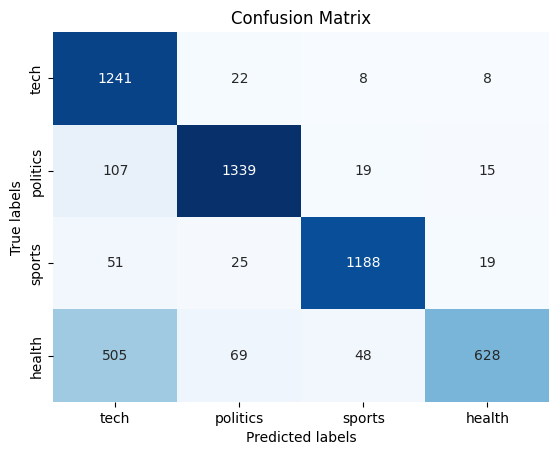

In [ ]:
ax = plt.subplot()
labels = ['tech', 'politics', 'sports', 'health']
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels = labels, yticklabels = labels)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
x = df_og.drop(columns = 'Hashtag')
y = df_og['Hashtag']


In [ ]:
# Example list of categories
categories = ['tech', 'politics', 'sports', 'health']

# Create a mapping dictionary for manual encoding
encoding_map = {category: i for i, category in enumerate(categories)}

# Manually encode the categories
class_y = [encoding_map[category] for category in y]

In [ ]:
class_y=np.array(class_y)

In [ ]:
np.unique(y,return_counts=True)

In [ ]:
np.unique(class_y,return_counts=True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, class_y, test_size=0.3, random_state=42)

In [ ]:
x_test_corpus=text_preprocessing(x_test)

In [ ]:
from scipy.spatial import distance
def prediction(tweet):
  existing_dicts= { 0: c0_pred_list,
                  1:c1_pred_list,
                  2:c2_pred_list,
                  3:c3_pred_list
                  }
  # existing_lists=[c0_pred_list,c1_pred_list,c2_pred_list,c3_pred_list]
  new_list=tweet
  def dict_to_vector(word_list, all_words):
      vector = np.zeros(len(all_words), dtype=int)
      for word in word_list:
          if word in all_words:
              vector[all_words.index(word)] = 1
      return vector

  # Collect all unique words from existing dictionaries and new list
  all_words = list(set().union(*existing_dicts.values(), new_list))

  # Convert the dictionaries to binary vectors
  existing_vectors = [dict_to_vector(lst, all_words) for lst in existing_dicts.values()]
  new_vector = dict_to_vector(new_list, all_words)
  # Calculate the Euclidean similarity scores between the new vector and each of the existing vectors
  similarity_scores = [distance.euclidean(new_vector, existing_vector) for existing_vector in existing_vectors]

  # Find the index of the most similar list (minimum similarity score)
  most_similar_index = np.argmin(similarity_scores)

  # Get the key (number) of the most similar list
  most_similar_key = list(existing_dicts.keys())[most_similar_index]

  # Print the most similar list
  return most_similar_key

In [ ]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

class FLSA_E_Embeddings:
    def __init__(self, num_topics, w2v_model):
        self.num_topics = num_topics
        self.w2v_model = w2v_model

    def _sigmoid_membership_function(self, x, a=1, b=0.5):
        return 1 / (1 + np.exp(-a * (x - b)))

    def _document_embedding(self, document):
        embeddings = [self.w2v_model.wv[key] for key in document if key in self.w2v_model.wv.key_to_index]
        if embeddings:
            return np.mean(embeddings, axis=0)
        else:
            return np.zeros(self.w2v_model.vector_size)

    def fit(self, corpus):
        # Create a Document-Embedding matrix using averaged Word2Vec embeddings
        document_embeddings = np.array([self._document_embedding(doc) for doc in corpus])

        # Fuzzify the Document-Embedding matrix
        scaler = MinMaxScaler()
        scaled_embeddings = scaler.fit_transform(document_embeddings)
        fuzzy_embeddings = self._sigmoid_membership_function(scaled_embeddings)

        # Apply LSA using SVD
        svd = TruncatedSVD(n_components=self.num_topics)
        self.U = svd.fit_transform(fuzzy_embeddings)
        self.Sigma = svd.singular_values_
        self.Vt = svd.components_

    def get_topics(self, num_words=10):
        # Extract the top words for each topic
        topics = []
        for idx, topic in enumerate(self.Vt):
            top_word_indices = np.argsort(np.dot(self.w2v_model.wv.vectors, topic))[-num_words:][::-1]
            top_words = [self.w2v_model.wv.index_to_key[i] for i in top_word_indices]
            topics.append(top_words)
        return topics



In [ ]:
flsa_e = FLSA_E_Embeddings(num_topics=4, w2v_model=w2v_model)
flsa_e.fit(corpus)

topics = flsa_e.get_topics(num_words=50)
for idx, topic_words in enumerate(topics):
    print(f"Topic {idx + 1}: {', '.join(topic_words)}")

In [ ]:
def generate_wordcloud_for_topic(topic_words):
    text = ' '.join(topic_words)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    return wordcloud

for idx, topic_words in enumerate(topics):
    wc = generate_wordcloud_for_topic(topic_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {idx + 1}")
    plt.show()

In [ ]:
np.random.seed(0)

In [ ]:
#fitting the corpus on MOvuegroup process
mgp = MovieGroupProcess(K=4, alpha=0.01, beta=0.01, n_iters=30,)

# vocab = set(x for review in reviews_lemmatized for x in review)
n_terms = len(corpus)
model = mgp.fit(corpus, n_terms)

In stage 0: transferred 7219 clusters with 4 clusters populated
In stage 1: transferred 4000 clusters with 4 clusters populated
In stage 2: transferred 2443 clusters with 4 clusters populated
In stage 3: transferred 1506 clusters with 4 clusters populated
In stage 4: transferred 938 clusters with 4 clusters populated
In stage 5: transferred 689 clusters with 4 clusters populated
In stage 6: transferred 557 clusters with 4 clusters populated
In stage 7: transferred 463 clusters with 4 clusters populated
In stage 8: transferred 383 clusters with 4 clusters populated
In stage 9: transferred 374 clusters with 4 clusters populated
In stage 10: transferred 361 clusters with 4 clusters populated
In stage 11: transferred 366 clusters with 4 clusters populated
In stage 12: transferred 380 clusters with 4 clusters populated
In stage 13: transferred 332 clusters with 4 clusters populated
In stage 14: transferred 353 clusters with 4 clusters populated
In stage 15: transferred 326 clusters with 4 c

In [ ]:
# print number of documents per topic
doc_count = np.array(mgp.cluster_doc_count)
print('Number of documents per topic :', doc_count)

# Topics sorted by the number of document they are allocated to
top_index = doc_count.argsort()[-15:][::-1]
print('Most important clusters (by number of docs inside):', top_index)

# define function to get top words per topic
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts = sorted(cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print("\nCluster %s : %s"%(cluster, sort_dicts))

# get top words in topics
top_words(mgp.cluster_word_distribution, top_index, 50)

Number of documents per topic : [2084 4361 2551 2582]
Most important clusters (by number of docs inside): [1 3 2 0]

Cluster 1 : [('politics', 4396), ('amp', 541), ('election', 410), ('bjp', 410), ('vote', 361), ('congress', 348), ('party', 341), ('people', 337), ('say', 331), ('news', 299), ('think', 282), ('new', 275), ('get', 255), ('political', 254), ('today', 230), ('government', 230), ('would', 209), ('make', 206), ('one', 200), ('right', 195), ('minister', 194), ('trump', 190), ('leader', 185), ('india', 172), ('health', 168), ('take', 166), ('day', 166), ('conservative', 166), ('want', 165), ('year', 164), ('like', 164), ('time', 163), ('need', 162), ('biden', 159), ('read', 155), ('state', 150), ('support', 148), ('president', 144), ('republican', 140), ('work', 138), ('back', 138), ('live', 136), ('democracy', 136), ('country', 131), ('come', 130), ('first', 128), ('democrat', 127), ('know', 125), ('next', 124), ('primeminister', 124)]

Cluster 3 : [('health', 1875), ('amp', 

In [ ]:
# Import wordcloud library
from wordcloud import WordCloud

# Get topic word distributions from gsdmm model
cluster_word_distribution = mgp.cluster_word_distribution
cluster_word_distribution

[{'healthy': 8,
  'mean': 16,
  'get': 76,
  'whole': 6,
  'lot': 9,
  'life': 33,
  'mentalhealth': 4,
  'health': 446,
  'look': 57,
  'size': 8,
  'join': 74,
  'raise': 9,
  'fund': 24,
  'mental': 4,
  'want': 22,
  'send': 5,
  'please': 12,
  'everyone': 13,
  'follow': 20,
  'twitter': 10,
  'update': 14,
  'consider': 3,
  'take': 59,
  'class': 11,
  'friend': 16,
  'beyond': 10,
  'apply': 10,
  'level': 29,
  'standard': 7,
  'start': 34,
  'doctor': 13,
  'mind': 13,
  'matter': 9,
  'group': 4,
  'tomorrow': 5,
  'welcome': 5,
  'first': 57,
  'one': 70,
  'back': 14,
  'food': 18,
  'much': 24,
  'need': 43,
  'return': 3,
  'thing': 16,
  'put': 10,
  'warn': 3,
  'never': 16,
  'make': 127,
  'enter': 9,
  'market': 68,
  'place': 8,
  'stop': 9,
  'truth': 4,
  'news': 48,
  'aid': 3,
  'power': 118,
  'fire': 5,
  'strong': 6,
  'child': 3,
  'professional': 6,
  'gift': 6,
  'every': 25,
  'time': 43,
  'talk': 28,
  'book': 14,
  'today': 65,
  'would': 21,
  'sign

In [ ]:
# Import wordcloud library
from wordcloud import WordCloud

# Get topic word distributions from gsdmm model
cluster_word_distribution = mgp.cluster_word_distribution
values=50
dic0={}
dic1={}
dic2={}
dic3 = {}

    # Select topic you want to output as dictionary (using topic_number)
topic_dict = sorted(cluster_word_distribution[0].items(), key=lambda k: k[1], reverse=True)[:values]
for i in topic_dict:
  dic0[i[0]] = i[1]

topic_dict = sorted(cluster_word_distribution[1].items(), key=lambda k: k[1], reverse=True)[:values]
for i in topic_dict:
  dic1[i[0]] = i[1]

topic_dict = sorted(cluster_word_distribution[2].items(), key=lambda k: k[1], reverse=True)[:values]
for i in topic_dict:
  dic2[i[0]] = i[1]

topic_dict = sorted(cluster_word_distribution[3].items(), key=lambda k: k[1], reverse=True)[:values]

for i in topic_dict:
  dic3[i[0]] = i[1]
#Dictionary of different clusters
# dic0,dic1,dic2,dic3



['technology', 'blockchain', 'health', 'innovation', 'tech', 'web', 'healthcare', 'amp', 'meded', 'medtwitter']


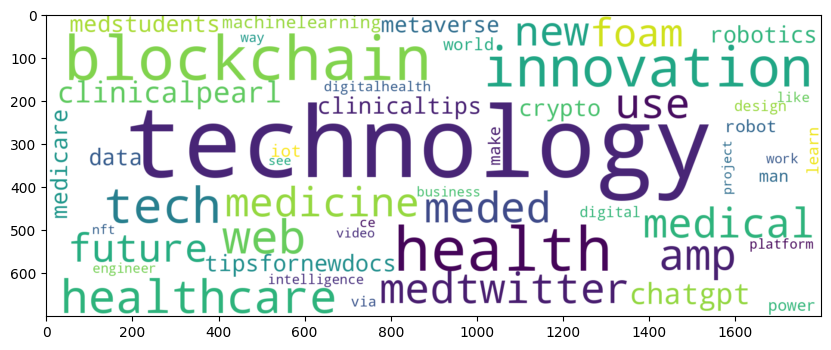

In [ ]:
# Generate a word cloud image
wordcloud = WordCloud(background_color='white',
                            width=1800,
                            height=700,
                            # font_path=path_to_font,
                            ).generate_from_frequencies(dic0)

# Print to screen
fig, ax = plt.subplots(figsize=[10,10])

# Get the word frequencies from the word cloud image
word_frequencies = Counter(wordcloud.words_)

# Set the number of top words you want to extract
num_top_words = 10

# Extract the most frequent words
c0_pred_list =[]
for i in range(10):
  c0_pred_list.append(word_frequencies.most_common(num_top_words)[i][0])
print(c0_pred_list)
#generate the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')

['politics', 'amp', 'election', 'bjp', 'vote', 'congress', 'party', 'people', 'say', 'news']


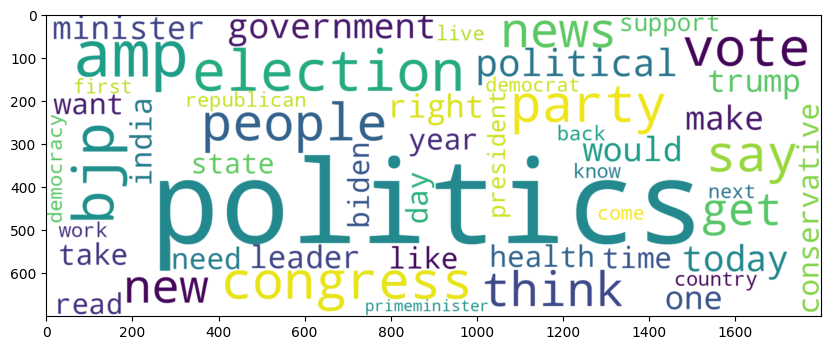

In [ ]:
# Generate a word cloud image
wordcloud = WordCloud(background_color='white',
                            width=1800,
                            height=700,
                            # font_path=path_to_font,
                            ).generate_from_frequencies(dic1)

# Print to screen
fig, ax = plt.subplots(figsize=[10,10])

# Get the word frequencies from the word cloud image
word_frequencies = Counter(wordcloud.words_)

# Set the number of top words you want to extract
num_top_words = 10

# Extract the most frequent words
c1_pred_list =[]
for i in range(10):
  c1_pred_list.append(word_frequencies.most_common(num_top_words)[i][0])
print(c1_pred_list)
#generate the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')

['health', 'amp', 'mentalhealth', 'mental', 'life', 'fitness', 'good', 'year', 'day', 'food']


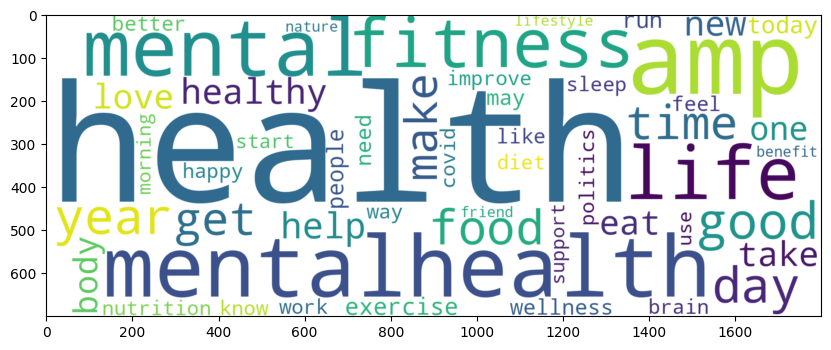

In [ ]:
# Generate a word cloud image
wordcloud = WordCloud(background_color='white',
                            width=1800,
                            height=700,
                            # font_path=path_to_font,
                            ).generate_from_frequencies(dic2)

# Print to screen
fig, ax = plt.subplots(figsize=[10,10])

# Get the word frequencies from the word cloud image
word_frequencies = Counter(wordcloud.words_)

# Set the number of top words you want to extract
num_top_words = 10

# Extract the most frequent words
c2_pred_list =[]
for i in range(10):
  c2_pred_list.append(word_frequencies.most_common(num_top_words)[i][0])
print(c2_pred_list)
#generate the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')

['health', 'amp', 'politics', 'technology', 'mentalhealth', 'mental', 'new', 'work', 'today', 'people']


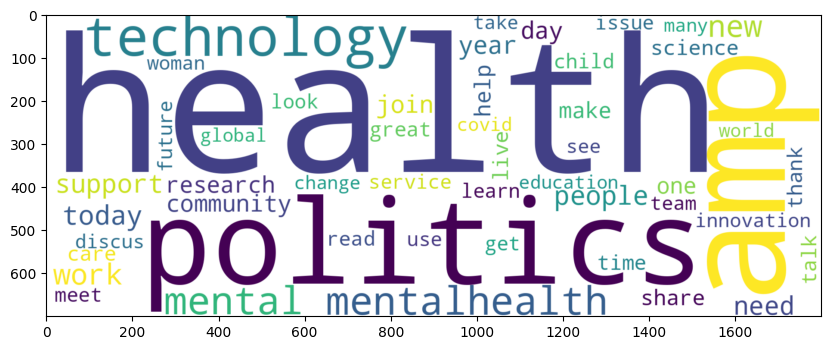

In [ ]:
# Generate a word cloud image
wordcloud = WordCloud(background_color='white',
                            width=1800,
                            height=700,
                            # font_path=path_to_font,
                            ).generate_from_frequencies(dic3)

# Print to screen
fig, ax = plt.subplots(figsize=[10,10])
# Get the word frequencies from the word cloud image
word_frequencies = Counter(wordcloud.words_)

# Set the number of top words you want to extract
num_top_words = 10

# Extract the most frequent words
c3_pred_list =[]
for i in range(10):
  c3_pred_list.append(word_frequencies.most_common(num_top_words)[i][0])
print(c3_pred_list)
#generate the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')

In [ ]:
def score_calc(pred_list):
  # Dictionary with categories and lists of top words in the category
  word_lists = {'health': ['health',
    'amp',
    'mentalhealth',
    'mental',
    'new',
    'life',
    'healthcare',
    'fitness',
    'get',
    'good'],
  'sports': ['sport',
    'ipl',
    'football',
    'cricket',
    'news',
    'match',
    'win',
    'vs',
    'game',
    'team'],
  'tech': ['technology',
    'ai',
    'blockchain',
    'innovation',
    'amp',
    'tech',
    'new',
    'web',
    'use',
    'future'],
  'politics': ['politics',
    'amp',
    'bjp',
    'vote',
    'people',
    'party',
    'congress',
    'say',
    'new',
    'news']}

  # List of words to compare with the dictionary
  word_list_to_compare = pred_list

  def jaccard_similarity(list1, list2):
      set1 = set(list1)
      set2 = set(list2)
      intersection = len(set1.intersection(set2))
      union = len(set1.union(set2))
      similarity = intersection / union
      return similarity

  # Calculate similarity between the word list and each category in the dictionary
  similarity_scores = {}
  for category, words in word_lists.items():
      # category_doc = nlp(" ".join(words))
      # word_list_doc = nlp(" ".join(word_list_to_compare))
      similarity_scores[category] = jaccard_similarity(word_list_to_compare, words)

  # Print the similarity scores
  for category, similarity_score in similarity_scores.items():
      print(f"Similarity with '{category}': {similarity_score:.4f}")


In [ ]:
#To name the cluster, clusetr 3 has most similarity with tech so it goes to tech topic, like wise check for other clusters
score_calc(c3_pred_list)

Similarity with 'health': 0.3333
Similarity with 'sports': 0.0000
Similarity with 'tech': 0.1765
Similarity with 'politics': 0.2500


In [ ]:
#calculation of coherence score
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

topics=[]

# top_40_wrods_topic_0=top_40_wrods_topic_0
# top_40_wrods_topic_1=top_40_wrods_topic_1
# # top_40_wrods_topic_2=top_40_wrods_topic_2

topics.append(c0_pred_list)
topics.append(c1_pred_list)
topics.append(c2_pred_list)
topics.append(c3_pred_list)
print(topics)

# Creating a dictionary with the vocabulary
word2id = Dictionary( corpus )

# Coherence model
cm = CoherenceModel(topics=topics,
                    texts=corpus,
                    coherence='c_v',
                    dictionary=word2id)

coherence_per_topic = cm.get_coherence_per_topic()
coherence = cm.get_coherence()
print(coherence)

[['technology', 'blockchain', 'health', 'innovation', 'tech', 'web', 'healthcare', 'amp', 'meded', 'medtwitter'], ['politics', 'amp', 'election', 'bjp', 'vote', 'congress', 'party', 'people', 'say', 'news'], ['health', 'amp', 'mentalhealth', 'mental', 'life', 'fitness', 'good', 'year', 'day', 'food'], ['health', 'amp', 'politics', 'technology', 'mentalhealth', 'mental', 'new', 'work', 'today', 'people']]
0.4322498517430437


In [ ]:
X = df.drop(columns = 'Hashtag')
y = df['Hashtag']

# Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tweets_y = le.fit_transform(y)

In [ ]:
# Label Mapping
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_name_mapping

{'health': 0, 'politics': 1, 'tech': 2, nan: 3}

In [ ]:
# Spliting Data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, tweets_y, test_size=0.30, random_state=0)

In [ ]:
# Dictionary of clusters we made
dictionary = {'sports' : c0_pred_list, 'politics' : c1_pred_list, 'health' : c2_pred_list, 'tech' : c3_pred_list}
dictionary

{'sports': ['technology',
  'blockchain',
  'health',
  'innovation',
  'tech',
  'web',
  'healthcare',
  'amp',
  'meded',
  'medtwitter'],
 'politics': ['politics',
  'amp',
  'election',
  'bjp',
  'vote',
  'congress',
  'party',
  'people',
  'say',
  'news'],
 'health': ['health',
  'amp',
  'mentalhealth',
  'mental',
  'life',
  'fitness',
  'good',
  'year',
  'day',
  'food'],
 'tech': ['health',
  'amp',
  'politics',
  'technology',
  'mentalhealth',
  'mental',
  'new',
  'work',
  'today',
  'people']}

In [ ]:
# Classifying the test data based on cosine similarity score

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

# Set up NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

# Dataset of texts
dataset = X_test['Tweet'].tolist()

# Predefined dictionary of categories
categories = dictionary

# Remove stopwords and tokenize the dataset
tokenized_dataset = []
for text in dataset:
    tokens = word_tokenize(text.lower())
    filtered_words = [word for word in tokens if word.isalnum() and word not in stop_words]
    tokenized_dataset.append(filtered_words)

# Train Word2Vec model
model = Word2Vec(tokenized_dataset, min_count=1, vector_size=300, epochs=100)

# Calculate similarity of each text to the dictionary words
results = []
for text in dataset:
    tokens = word_tokenize(text.lower())
    filtered_words = [word for word in tokens if word.isalnum() and word not in stop_words]

    similarities = {}
    for category, words in categories.items():
        category_vectors = [model.wv[word] for word in words if word in model.wv.key_to_index]
        if category_vectors:
            category_similarity = sum(model.wv.n_similarity([category_vector], filtered_words) for category_vector in category_vectors)
            similarities[category] = category_similarity

    predicted_category = max(similarities, key=similarities.get)
    results.append((text, predicted_category))

# Create a dataframe with the text and classification
df_new = pd.DataFrame(results, columns=['Text', 'Classification'])
df_new['Classification'] = df_new.Classification.map({'health': 0, 'politics': 1, 'sports': 2, 'tech': 3})
df_new

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Text,Classification
0,today pm vs let talk about mental health menta...,0
1,borah say that sinha would be receive by apcc ...,1
2,what journey with and her amaze team thank to ...,0
3,view from the gp front line in today how busy ...,0
4,naked prosthetics goal be to help support chan...,2
...,...,...
3469,our immoral and inhumane immigration system po...,1
3470,today we be announce our first investment in t...,3
3471,first week of class at and it give me life and...,0
3472,beautifully do ve see more elegant prolapse po...,1


In [ ]:
# Checking the accuracy
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report
acc = accuracy_score(y_test, df_new.Classification)
cm = confusion_matrix(y_test, df_new.Classification)
acc, cm

(0.8123200921128382,
 array([[ 992,    8,  206,  103],
        [  65, 1236,   47,  146],
        [  15,   11,  594,   50],
        [   0,    1,    0,    0]]))

In [ ]:
print(classification_report(y_test, df_new.Classification))

              precision    recall  f1-score   support

           0       0.93      0.76      0.83      1309
           1       0.98      0.83      0.90      1494
           2       0.70      0.89      0.78       670
           3       0.00      0.00      0.00         1

    accuracy                           0.81      3474
   macro avg       0.65      0.62      0.63      3474
weighted avg       0.91      0.81      0.85      3474



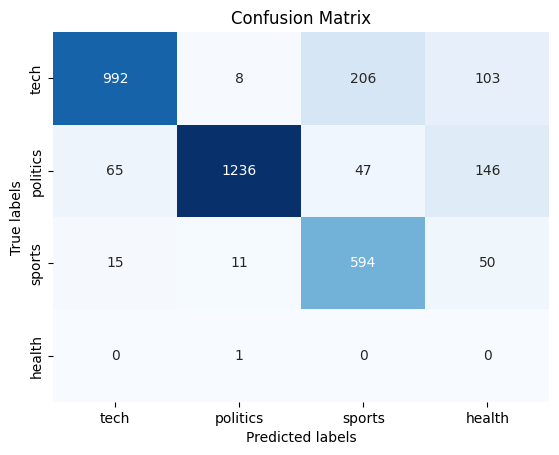

In [ ]:
ax = plt.subplot()
labels = ['tech', 'politics', 'sports', 'health']
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels = labels, yticklabels = labels)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()